In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt 

df=pd.read_csv("Customers.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


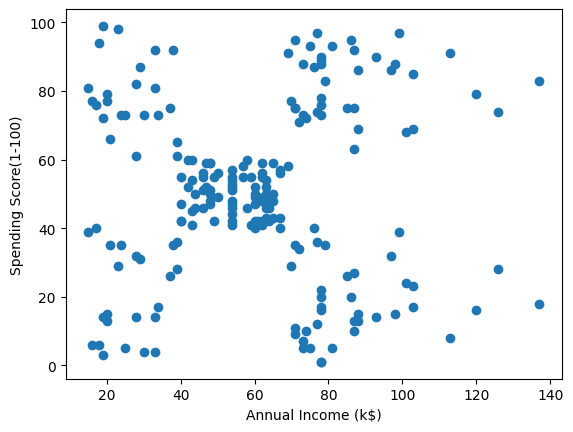

In [3]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [10]:
df.rename(columns={'Annual Income (k$)':'Income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)':'Score'}, inplace=True)
df.head()

,CustomerID,Income,Score
0,1,0.000000,39
1,2,0.000000,81
2,3,0.008197,6
3,4,0.008197,77
4,5,0.016393,40


In [11]:
scaler=MinMaxScaler()

scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

scaler.fit(df[['Score']])
df['Score']=scaler.transform(df[['Score']])

df.head()

,CustomerID,Income,Score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [12]:
# Find K Values with Elbow Method
k_range=range(1,11)

list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df[['Income','Score']])
    list_dist.append(kmeans_model.inertia_)

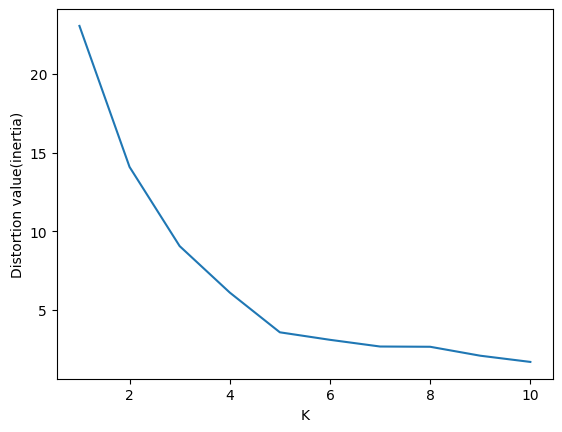

In [13]:
plt.xlabel('K')
plt.ylabel('Distortion value(inertia)')
plt.plot(k_range,list_dist)
plt.show()

K=5 is our optimal value

In [15]:
kmeans_model=KMeans(n_clusters=5)
y_predicted=kmeans_model.fit_predict(df[['Income','Score']])
y_predicted

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [16]:
df['cluster']=y_predicted
df.head()

,CustomerID,Income,Score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,0
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,0
4,5,0.016393,0.397959,3


In [17]:
kmeans_model.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.59631148, 0.16921769],
       [0.58638083, 0.82783883],
       [0.08792846, 0.19619666],
       [0.32695811, 0.49533888]])

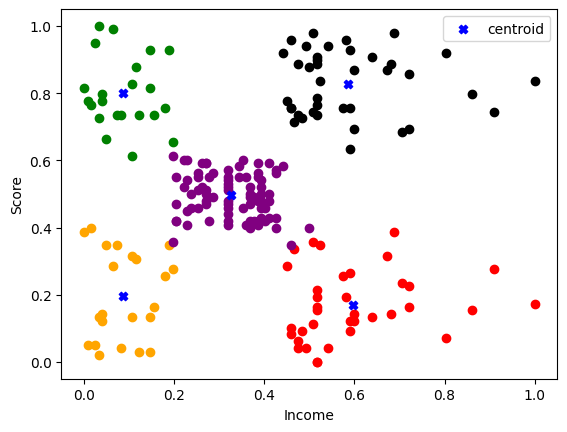

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.xlabel('Income')
plt.ylabel('Score')
plt.scatter(df1['Income'],df1['Score'],color='green')
plt.scatter(df2['Income'],df2['Score'],color='red')
plt.scatter(df3['Income'],df3['Score'],color='black')
plt.scatter(df4['Income'],df4['Score'],color='orange')
plt.scatter(df5['Income'],df5['Score'],color='purple')

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()